# Least Squares, PCA, SVD, Linearization Walkthrough

### CSM EECS 16A/16B: Designing Information Devices and Systems I/II, Fall 2023

As a note, this iPython notebook is completely optional for now. This is kind of a 16A and 16B crossover. In this iPython notebook, we'll be going over least squares, PCA (principal component analysis), SVD (singular value decomposition), and linearization. These methods are useful in data analysis and prediction! PCA and SVD will be shown after least squares, so if you're taking 16A right now, it's (probably) not in scope for you to know the rest of the topics. However, it is a good warmup or source of info for now if you plan on taking 16B as well.

This notebook will have few parts that require user input other than running certain blocks of code. However, please read the descriptions. At the time of writing this I realize that it may have been too ambitious to include all of these topics.

<!---

This is a test run written by Damanic Luck, Fall 2023. If you're clicking on this comment, congrats! idk what people will do with this, but hopefully its helpful. feel free to email me at damanicluck@berkeley.edu if you see this comment! :D. yk ngl i was a sophmore when i wrote this so like if it seems limited in anyway thats probably why. i was like taking 70/61c and i was just deciding what upper divs to take so im definitely not an expert in any way possible i just tried researching this as much as i could and asked for help proofreading

_______oBBBBB8o______oBBBBBBB 
_____o8BBBBBBBBBBB__BBBBBBBBB8________o88o, 
___o8BBBBBB**8BBBB__BBBBBBBBBB_____oBBBBBBBo, 
__oBBBBBBB*___***___BBBBBBBBBB_____BBBBBBBBBBo, 
_8BBBBBBBBBBooooo___*BBBBBBB8______*BB*_8BBBBBBo, 
_8BBBBBBBBBBBBBBBB8ooBBBBBBB8___________8BBBBBBB8, 
__*BBBBBBBBBBBBBBBBBBBBBBBBBB8_o88BB88BBBBBBBBBBBB, 
____*BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB8, 
______**8BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB*, 
___________*BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB8*, 
____________*BBBBBBBBBBBBBBBBBBBBBBBB8888**, 
_____________BBBBBBBBBBBBBBBBBBBBBBB*, 
_____________*BBBBBBBBBBBBBBBBBBBBB*, 
______________*BBBBBBBBBBBBBBBBBB8, 
_______________*BBBBBBBBBBBBBBBB*, 
________________8BBBBBBBBBBBBBBB8, 
_________________8BBBBBBBBBBBBBBBo, 
__________________BBBBBBBBBBBBBBB8, 
__________________BBBBBBBBBBBBBBBB, 
__________________8BBBBBBBBBBBBBBB8, 
__________________*BBBBBBBBBBBBBBBB, 
__________________8BBBBBBBBBBBBBBBB8, 
_________________oBBBBBBBBBBBBBBBBBB, 
________________oBBBBBBBBBBBBBBBBBBB, 
________________BBBBBBBBBBBBBBBBBBBB, 
_______________8BBBBBBBBBBBBBBBBBBB8, 
______________oBBBBBBBBB88BBBBBBBBB8, 
______________8BBBBBBBBB*8BBBBBBBBB*, 
______________BBBBBBBBB*_BBBBBBBBB8, 
______________BBBBBBBB8_oBBBBBBBBB*, 
______________8BBBBBBB__oBBBBBBBB*, 
______________BBBBBBB*__8BBBBBBB*, 
_____________8BBBBBB*___BBBBBBB*, 
____________8BBBBBB8___oBBBBBB8, 
___________8BBBBBB8____8BBBBBB*, 
__________oBBBBBB8____BBBBBBB8, 
__________BBBBBBB8___BBBBBBBB*, 
_________oBBBBBBB8___BBBBBBBB, 
_________8BBBBBB8____BBBBBBB*, 
_________BBBBBB*_____8BBBBB*, 
________oBBBB8_______BBBBB*, 
________oBBB8________BBBB*, 
______8BBBB*_______*BBBBBBBB8o, 
______BBBBB*____________*88BBBo

--->

Credit note: Written by Damanic Luck and Alex Um, Fall 2023. During the process of writing, formatting from EECS16A Touch Lab1 and 3D plots from EECS16B Lab was referenced.


# Table of Contents

### Least Squares
* [Least Squares Introduction](#lst_sq_instruct)
* [Least Squares Motivation and Geometric Derivation](#lst_sq_motivation)

### SVD (Singular Value Decomposition)
* [SVD Introduction](#svd_instruct)

### PCA (Principal Component Analysis)
* [PCA Introduction](#pca_instruct)



In [5]:
# Run this block before you start this walkthrough, if you see code blocks 
# accompanying a text block explaining, you should just assume that you have to run it

import matplotlib as plt
import numpy as np
from ipywidgets import interact, interactive, interact_manual
from IPython.display import Image 

#we need this line to have visualizations within this notebook
%matplotlib inli

<a id = 'lst_sq_instruct'></a>
## Least Squares Introduction

<a id = 'lst_sq_motivation'></a>
### Motivation
Why should we learn about least squares? Let's say in a lab setting you are trying to analyze data and form some equation that can model and predict future behavior of your system.

In this walkthrough, we'll be going over the geometric derivation of least squares. Week 11 of Fall 2023 features a least squares question walking you through how to derive it via the *algebraic* method.

<a id = 'svd_instruct'></a>
## SVD Introduction

<span style= "color:red"> TODO: insert overview of why SVD is important and its connection to PCA, we assume they read the 16b notes for the most part, so insert a brief explanation and then we go into image compression example<sup>1</sup> </span>

One common application of SVD you might see would be in image compression. We will be using this image. You can use any picture. Just drag into the same directory as this iPython notebook and change what the image url each time that we need it.

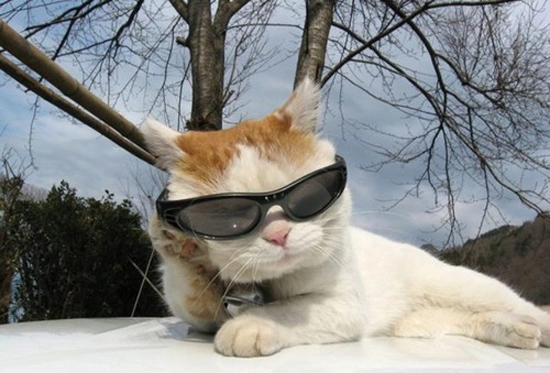

In [4]:
# Run this box to see the picture
Image("svd_ex.png")

<span style= "color:red"> TODO: Use latex with dollar signs $\alpha^2 + \left(\frac{1}{2x^2}\right)$ </span>


<a id = 'pca_instruct'></a>
## PCA Introduction

Now that we've covered SVD, we proceed to PCA! This is placed after the SVD section, since SVD will be what happens "under the hood" for PCA.


<span style= "color:red"> TODO: i want to make this [spinning chart with a sliding thingie using ipywidgets](https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca) </span>

Sources
The appropriate text has been indicated with a number where credit is due
* [1: Tim Baumann](http://timbaumann.info/svd-image-compression-demo/)
